# `Практикум по программированию на языке Python`
<br>

## `Занятие 7: Введение в инструменты для машинного обучения`
<br><br>

### `Мурат Апишев (mel-lain@yandex.ru)`

#### `Москва, 2023`

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

### `Прежде, чем перейти к обучению ML-моделей, вспомним основы`

- Какие есть постановки задач машинного обучения?<br><br>
- Что такое обучение с учителем?<br><br>
- Что такое обучение без учителя?<br><br>
- Что такое минимизация эмпирического риска?<br><br>
- Что такое переобучение, как с ним бороться?<br><br>
- Что такое кроссвалидация? Какие бывают виды?

### `Библиотека sklearn`

- Стандартная и основная библиотека для general ML в Python<br><br>
- Реализует многие используемые алгоритмы и модели, иногда в качестве обёртки<br><br>
- Содержит множество полезных утилит для работы с данными, подбора параметров модели и оценивания качества<br><br>
- Имеет понятный унифицированный интерфейс<br><br>
- Использует NumPy и SciPy<br><br>

### `Напоминание: линейные модели`

- Модель имеет вид $a(x, w) = \langle x, w \rangle$<br><br>

- В задаче классификации ответ $y$ принадлежит дискретному множеству<br><br>

- В задаче регрессии $y \in \mathbb{R}$<br><br>

- Вид модели определяет дифференцируемая функция потерь $\mathcal{L}(y, a(x, w))$<br><br>

- Линейная регрессия: $\mathcal{L} = (y - a(x, w))^2$<br><br>

- В классификации используются различные аппроксимации пороговой функции потерь:<br><br>

    - Логистическая (лог-регрессия): $\mathcal{L} = \log(1 + \exp(-a\langle x, w \rangle y))$
    - Кусочно-линейная (линейный SVM): $\mathcal{L} = (1 - a\langle x, w \rangle y)_+$
    - Ещё несколько других

### `Напоминание: метрики качества`

- Функционал качества $\ne$ метрика качества<br><br>

- Функционал удобно дифференцировать, его вид определяет свойства модели<br><br>

- Метрика - внешний объективный критерий качества решения задачи, от модели обычно не зависит<br><br>

- Популярные метрики для задачи классификации:<br><br>

    - accuracy
    - precision/recall
    - F1-measure
    - ROC AUC
    - AUC PR<br><br>

- Популярные метрики для задачи регрессии:<br><br>

    - MAE
    - MSE
    - RMSE

### `Пример запуска лог-регрессии из sklearn`

In [1]:
import seaborn
from sklearn.linear_model import LogisticRegression

df = seaborn.load_dataset('iris')

X = df[df.columns[: -1]].values
y = df['species'].values

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X, y)

preds = model.predict(df[df.columns[: -1]].values)

print('Train accuracy: {}'.format(sum([i == j for i, j in zip(preds, y)]) / float(len(preds))))

Train accuracy: 0.96


### `Можем выбрать другую модель`

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR

### `Можем выбрать другие параметры модели`

In [3]:
model = LogisticRegression(penalty='l2',       # or 'l1'
                           C=1.0,              # or any float > 0.0 (less == stronger penalty)
                           class_weight=None,  # or dict, or 'balanced'
                           solver='liblinear', # or 'lbfgs', 'sag', 'saga'
                           multi_class='ovr'   # or 'multinomial'
                           )

### `Можем разбить данные на обучение и тест`

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)

(135, 4)
(135,)
(15, 4)
(15,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### `Можем померять качество на тесте встроенными средствами`

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

preds = model.predict(X_test)
print('Test Accuracy: {}'.format(accuracy_score(y_test, preds)))
print('Test f1-score: {}\n'.format(f1_score(y_test, preds, average='macro')))

probs = model.predict_proba(X_test)
print(probs[: 5])

Test Accuracy: 0.8666666666666667
Test f1-score: 0.7857142857142857

[[8.48574952e-01 1.51407793e-01 1.72549282e-05]
 [9.80086647e-04 3.93724396e-01 6.05295518e-01]
 [6.33415596e-03 2.51172974e-01 7.42492870e-01]
 [6.97600507e-04 1.16864628e-01 8.82437771e-01]
 [2.08252171e-02 6.58094588e-01 3.21080195e-01]]


В `sklearn.metrics` есть десятки разнообразных метрик для различных задач

### `Можем подобрать гиперпараметры по сетке`

In [10]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr'),
                     cv=5,
                     param_grid={"C": [0.5, 1.0, 10.0, 100.0]},
                     scoring=make_scorer(f1_score, **{'average':'macro'}))

model.fit(X_train, y_train)
f1_score(y_test, model.predict(X_test), average='macro')

0.9076923076923077

### `Можем воспользоваться кроссвалидацией`

In [11]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(LogisticRegression(solver='liblinear', multi_class='ovr'),
                            X_train,
                            y_train,
                            cv=3,
                            return_train_score=True,
                            scoring=make_scorer(f1_score, **{'average':'macro'}))

print('Train scores: {}'.format(cv_results['train_score']))
print('Test scores: {}'.format(cv_results['test_score']))

Train scores: [0.9666574  0.95555556 0.96773354]
Test scores: [0.97840474 0.93521421 0.95396825]


### `Можем посмотреть на веса признаков`

- Интерпретируемость доступная благодаря тому, что мы используем линейную модель
- Важно, чтобы признаки имели один масштаб значений

In [13]:
import pandas as pd
df = pd.DataFrame(data=model.best_estimator_.coef_,
                  columns=df.columns[: -1],
                  index=model.classes_)

df

,sepal_length,sepal_width,petal_length,petal_width
setosa,0.936643,3.054329,-4.849467,-2.419512
versicolor,0.213950,-3.088029,1.144720,-2.913226
virginica,-3.836725,-3.116696,6.009686,9.748844


In [103]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# helper function for visualization

# level parameter should be tuned by hand for more convenient sight

def plot_results(model, X, y, level=1.0, cmap_objects=plt.cm.OrRd, cmap_plot=plt.cm.OrRd,
                 use_decision_function=True, plot_logreg=False):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(7, 6))
    plt.clf()

    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap_objects, s=50)

    plt.axis('tight')

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_bound = np.abs(x_max - x_min) / 10.0
    x_min -= x_bound
    x_max += x_bound

    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    y_bound = np.abs(y_max - y_min) / 10.0
    y_min -= y_bound
    y_max += y_bound

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

    use_Z = False
    if hasattr(model, "decision_function") and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
        use_Z = True
    elif hasattr(model, "predict"):
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        use_Z = True

    # Put the result into a color plot
    if use_Z:
        Z = Z.reshape(XX.shape)
        plt.figure(1, figsize=(7, 6))
        plt.pcolormesh(XX, YY, Z, cmap=cmap_plot)
        if hasattr(model, "support_vectors_"):
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-level, 0, level])
        elif plot_logreg:
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1e-10, 0, 1e+10])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

### `Можем сгенерировать данные`

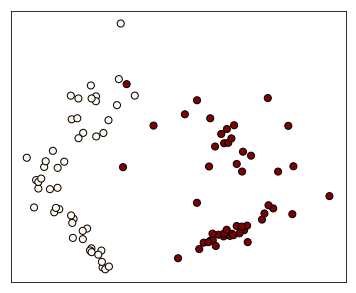

In [87]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_classes=2, n_samples=100, n_redundant=0, random_state=1)

plt.figure(1, figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.OrRd, s=50, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.show()

### `Обучим линейный SVM`

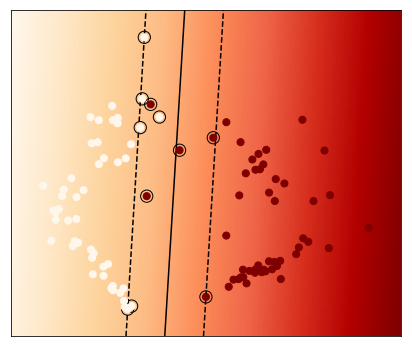

In [81]:
import sklearn.svm as svm

model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)
plot_results(model, X, y)

### `Лог-регрессия разделяет так`

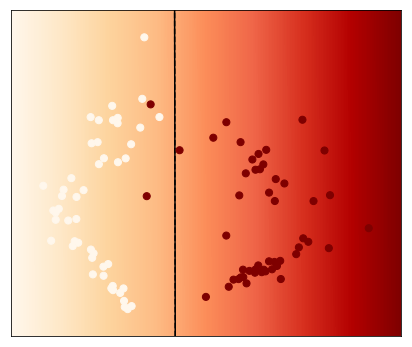

In [82]:
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
plot_results(model, X, y, plot_logreg=True)

### `А что делать с такими данными?`

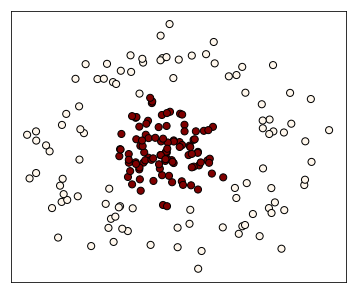

In [88]:
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.2, factor=0.2, random_state=1, n_samples=200)

plt.figure(1, figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.OrRd, s=50, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.show()

### `Вспомним про ядровой SVM`

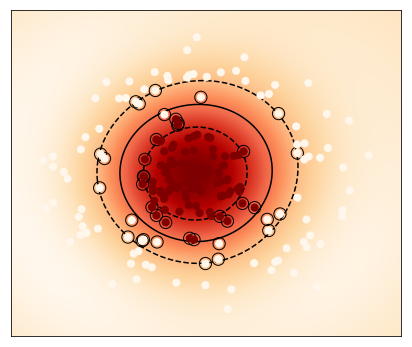

In [84]:
model = svm.SVC(kernel='rbf', C=1.0, gamma=1.0)
model.fit(X, y)
plot_results(model, X, y, level=0.98)

### `Данные для линейных моделей`

- __Влияние выбросов__<br><br>

    - на линейную регрессию - сильное
    - на логистическую регрессию - умеренное
    - на линейный SVM - сильное, если выброс стал опорным вектором<br><br>
    
- __Несбалансированность данных нежелательна__<br><br>
    - простейший способ борьбы -- сэмплировать объекты доминирующего класса
    - в разных задачах бывает возможным генерировать объекты, похожие на объекты меньшего класса<br><br>
    
- __Признаки объектов для линейных моделей нужно нормировать__<br><br>
    - веса становятся интерпретируемыми
    - градиентные методы оптимизации лучше сходятся

### `Напоминание: метрические модели`

- Основываются на расстояних между объектами<br><br>
- Основные функции расстояния:<br><br>
    - Евклидово расстояние: $p(x, y) = \sqrt{\sum_i(x_i - y_i)^2}$<br><br>
    - Манхэттенское расстояние: $p(x, y) = \sum_i|x_i - y_i|$<br><br>
    - Расстояние Чебышева: $p(x, y) = \max(|x_i - y_i|)$<br><br>
    - Косинусное расстояние: $p(x, y) = \cfrac{\langle x, y \rangle}{||x|| * ||y||}$<br><br>
- Могут использоваться как для обучения с учителем, так и без<br><br>
- Самые известные представители: kNN и k-means

### `Напоминание: метрические модели`

- Результаты работы сильно зависят от выбора функции близости и признакового описания<br><br>

- Признаки нуждаются в нормализации:<br><br>

    - можно делать _мини-макс нормализацию_: $\hat x = \cfrac{x - \min(x)}{\max(x) - \min(x)}$
    - можно _Z-нормализацию_: $\hat x = \cfrac{x - \mathbb{E}(x)}{\sigma(x)}$<br><br>
    
- kNN можно модифицировать для ускорения поиска ближайших соседей (возможно приближённого)<br><br> 
- возможны различные варианты учёта соседей и расстояний до них<br><br>  
- kNN может использоваться на практике для быстрой фильтрации кандидатов на более точную обработку

### `Применим kNN к последней выборке`

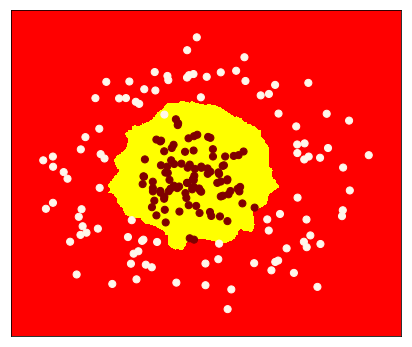

In [92]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
plot_results(model, X, y, cmap_plot=plt.cm.autumn)

### `А как поведёт себя кластеризация k-means?`

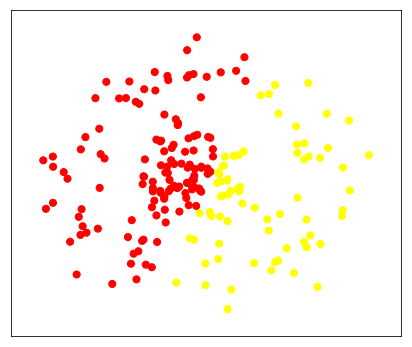

In [107]:
from sklearn.cluster import k_means

model = k_means(X, n_clusters=2)
labels = model[1]
plot_results(model, X, labels, cmap_objects=plt.cm.autumn)

### `Частичное обучение`

- Иногда у нас есть какое-то количество размеченных примеров
- Можно ими воспользоваться, для этого есть модуль `sklearn.semi_supervised`

Подготовим данные:

In [130]:
import numpy.random as rnd

indices = rnd.choice(range(len(y)), int(len(y) / 10), replace=False)
y_masked = np.full(len(y), -1)
y_masked[indices] = y[indices]

### `Частичное обучение`

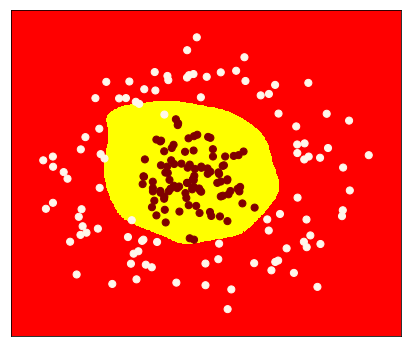

In [131]:
from sklearn.semi_supervised import LabelSpreading

model = LabelSpreading()
model.fit(X, y_masked)
plot_results(model, X, y, cmap_plot=plt.cm.autumn)

### `Напоминание: решающие деревья (логические модели)`

- Decision Tree представляет собой бинарное дерево<br><br>
    - в узлах - условия расшепления выборки
    - в листах - ответы модели<br><br>

- Как правило, в жизни используются деревья с условием расщепления в виде бинарного порога на значениях одного признака<br><br>

- Деревья не используют расстояния между объектами, только взаимные положения на осях признаков<br><br>

- Различные критерии оценки качества расщепления приводят к различным моделям<br><br>

- Полноценное обучение дерева - вычислительно сложная задача, поэтому используются жадные алгоритмы

### `Напоминание: решающие деревья (логические модели)`

__Преимущества__:<br><br>

- простые и отлично интерпретируемые
- перебор по значению критерия расщепления обеспечивает встроенный отбор признаков
- устойчивыми к монотонным преобразованиям признаков и позволяет работать с признаками различной природы
- Деревья сильно переобучаются, поэтому в жизни используются редко
- Зато в составе композиций работаю очень круто<br><br>

__Недостатки__:<br><br>

- склонны к переобучению
- модель получается сложной при аппроксимации разделяющей поверхности, не параллельной признаковым осям координат
- добавление новых объектов требует переобучения дерева


### `Напоминание: композиции над решающими деревьями`

- Сами по себе решающие деревья используются только в простейших задачах, требующих интерпретируемости<br><br>

- А вот композиции деревьев оказались очень мощными моделями, способными решать сложные задачи<br><br>

- Два основных типа композиций деревьев:<br><br>

    - Случайный лес (Random Forest) - композиция сложных деревьев (Bagging + Random Subspace Method)<br><br>

    - Градиентный бустинг - композиция простых деревьев, каждое следующее дерево обучается исправлять ошибки предшественников<br><br>
    
- Отдельной разновидностью случайных лесов являются Extremely Randomized Trees - модификация, в которой выбор порога для каждого признака-кандидата в дереве производится случайно, а не перебором

### `Напоминание: Out-of-Bag Score для случайного леса`

- Каждое дерево обучается по подмножеству объектов<br><br>
    
- Для каждого дерева есть существенное подмножество выборки, которое является контрольным для этого дерева<br><br>
    
- По этому подмножеству можно оценивать качество дерева<br><br>

- Это даёт возможность не использовать выделенную валидационную выборку

### `Основные библиотеки`

- Библиотеки общего назначения:<br><br>
    - `sklearn`<br><br>

- Библиотеки для обучения градиентного бустинга над решающими деревьями:<br><br>

    - `XGBoost`
    - `LightGBM`
    - `CatBoost`<br><br>

- Отличаются
    - скоростью
    - способом организацией параллелизма
    - способом оптимизации обучения и разбиений деревьев
    - способом обработки категориальных признаков

### `Композиции в sklearn`

In [133]:
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### `Подготовка данных`

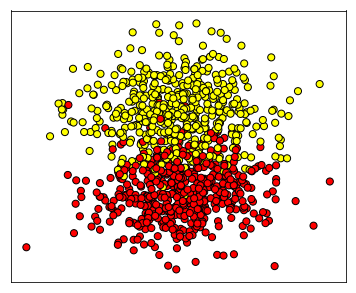

In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, random_state=9, n_clusters_per_class=1, shuffle=True)

plt.figure(1, figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.autumn, s=50, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.show()

In [170]:
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

def plot_results(model, X, y, level=1.0, cmap=plt.cm.autumn, use_decision_function=True):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(6, 5))
    plt.clf()

    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap, s=50, edgecolors='k')

    plt.axis('tight')

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_bound = np.abs(x_max - x_min) / 10.0
    x_min -= x_bound
    x_max += x_bound

    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    y_bound = np.abs(y_max - y_min) / 10.0
    y_min -= y_bound
    y_max += y_bound

    XX, YY = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]

    if hasattr(model, "decision_function") and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    else:
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(6, 5))
    plt.pcolormesh(XX, YY, Z, cmap=ListedColormap(['#ff9999','#fff899']))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

### `Обучение классификатора Random Forest`

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=250, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### `Основные параметры случайного леса в sklearn`<br><br>

- `n_estimators` - число деревьев в лесу<br><br>
- `criterion` - критерий ветвления<br><br>
- `min_samples_split` - минимальное число объектов в листе, допускающее деление<br><br>
- `min_samples_leaf` - минимальное число элементов в листе<br><br>
- `max_features` - максимально число перебираемых признаков при поиске лучшего ветвления<br><br>
- `oob_score` - нужно ли использовать Out-of-bag score для оценивания обобщающей способности леса<br><br>
- `n_jobs` - число параллельных потоков

### `Визуализация результатов`

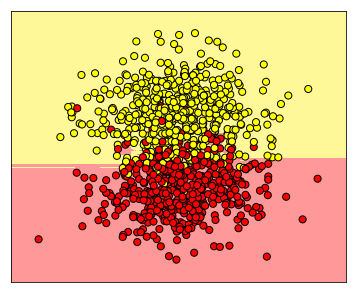

In [171]:
plot_results(forest, X, y)

### `Важность признаков`

Помним, что выборка генерировалась с игнорированием одного из признаков

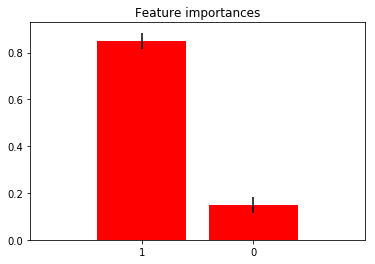

In [149]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### `Out-of-Bag score`

In [150]:
from sklearn.metrics import accuracy_score

oob_accuracy = []
test_accuracy = []
for i in range(10, 400, 10):
    forest = RandomForestClassifier(n_estimators=i, random_state=0, oob_score=True)
    forest.fit(X_train, y_train)

    oob_accuracy.append(forest.oob_score_)
    y_pred = forest.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_pred))

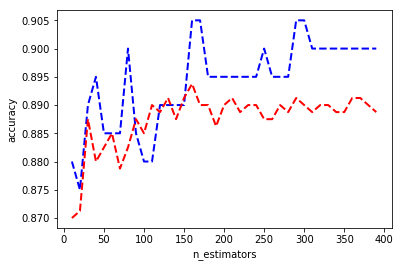

In [152]:
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.plot(range(10, 400, 10), test_accuracy, 'b--',
         range(10, 400, 10), oob_accuracy, 'r--', linewidth=2)
plt.show()

### `GB в sklearn`

- Не самое эффективное по времени и памяти решение
- Лучше вместо этой реализации использовать xgboost или catboost
- Посмотрим для общего развития, принципиально ничего нового нет

### `Обучение классификатора Gradient Boosting`

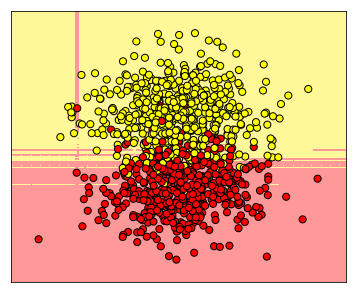

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=250, random_state=0)
gbc.fit(X_train, y_train)
plot_results(gbc, X, y)

### `Основные параметры градиентного бустинга в sklearn`<br><br>

- `loss` - оптимизируемый функционал<br><br>
- `learning_rate` - скорость обучения (по деревьям)<br><br>
- `n_estimators` - число деревьев<br><br>
- `subsample` - доля объектов для обучения каждого дерева<br><br>
- `criterion` - критерий качества разбиения<br><br>
- `min_samples_split` - минимальное число объектов в листе, допускающее деление<br><br>
- `min_samples_leaf` - минимальное число элементов в листе<br><br>
- `max_depth` - максимальная глубина каждого дерева<br><br>
- `min_impurity_decrease` - минимальный выигрыш от разбиения, допускающий его проведение<br><br>
- `max_features` - максимально число перебираемых признаков при поиске лучшего ветвления

### `Сгенерируем более сложные данные`

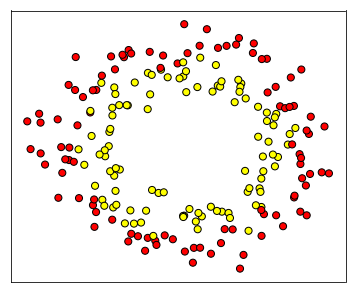

In [173]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, factor=0.7, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure(1, figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.autumn, s=50, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.show()

### `Запустим xgboost`

- быстрая (параллельная), экономичная по памяти
- может запускаться на разных платформах и распределённых фреймворках
- допускает ускорение обучения с помощью GPU

0.75


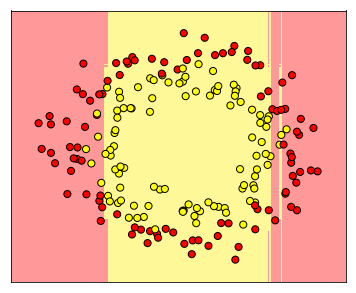

In [174]:
import xgboost as xgb

xgbc = xgb.XGBClassifier(objective='reg:linear', colsample_bytree=0.3,
                         learning_rate=0.1, max_depth=3,
                         alpha=10, n_estimators=10)
xgbc.fit(X_train, y_train)
print(accuracy_score(y_test, xgbc.predict(X_test)))
plot_results(xgbc, X, y)

### `Попробуем другие параметры`

0.9


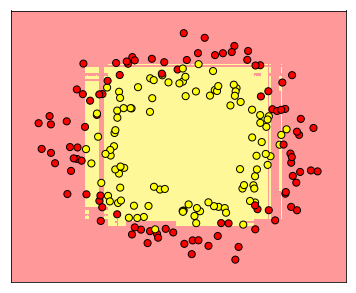

In [175]:
xgbc = xgb.XGBClassifier(objective='reg:linear', colsample_bytree=0.3,
                         learning_rate=0.05, max_depth=3,
                         alpha=10, n_estimators=100)
xgbc.fit(X_train, y_train)

print(accuracy_score(y_test, xgbc.predict(X_test)))
plot_results(xgbc, X, y)

### `Попробуем другие параметры`

0.925


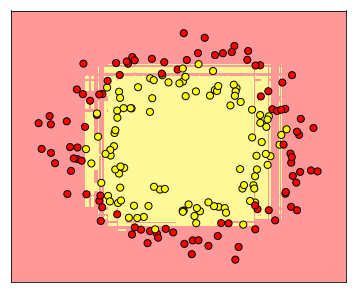

In [176]:
xgbc = xgb.XGBClassifier(objective='reg:linear', colsample_bytree=0.3,
                         learning_rate=0.001, max_depth=3,
                         alpha=10, n_estimators=10000)
xgbc.fit(X_train, y_train)

print(accuracy_score(y_test, xgbc.predict(X_test)))
plot_results(xgbc, X, y)

### `Важные параметры xgboost`<br><br>

- `learning_rate` - скорость обучения (по деревьям)
- `max_depth` - максимальная глубина каждого дерева
- `subsample` - доля объектов для обучения каждого дерева
- `colsample_bytree` - максимально число перебираемых признаков при поиске лучшего ветвления
- `n_estimators` - число деревьев
- `objective` - оптимизируемый функционал<br><br>

Одним из преимуществ xgboost является наличие регуляризации:

- `gamma` - коэффициент, влияющий на проверку уменьшения функционала перед ветвлением (ветвление может не произойти)
- `alpha` - коэффициент $L_1$-регуляризации для весов деревьев
- `lambda` - коэффициент $L_2$-регуляризации для весов деревьев

### `Пример из жизни: задача регрессии`

- **Проблема:** у объектов много категориальных признаков<br><br>
- **Инженерное решение**: изучить все категориальные признаки и с умом перекодировать их в числовые<br><br>
- **Решение в лоб**:
    - перекодировать всё не глядя в one-hot
    - получится много признаков, больше, чем объектов в выборке (~$10^5$)
    - применить матричное разложение, сократить размерность до нескольких тысяч
    - запустить на этом xgboost<br><br>
- Во втором варианте изначально получилось качество, более низкое, чем требуемое
- Так вышло из-за того, что задание изначально было рассчитано на работу с признаками
- **Но!** Запуск на мощной машине большого (~$10^4$ деревьев) бустинга в `xgboost` дал нужное качество
- В итоге время аналитика было замещено временем машины при том же результате

### `Библиотека catboost`

- `CatBoost` способен упростить решение ещё сильнее<br><br>
- `CatBoost` во многом похож на `XGBoost` (на GPU тоже может обучаться)<br><br>
- Умеет из коробки работать с категориальными признаками<br><br>
- В экспериментах авторов работает лучше `XGBoost` (как и обычно в научных статьях)<br><br>
- Есть ещё полезные примочки, например визуализации обучения

### `Возьмём пример из документации`

Посмотреть его и другие примеры можно [тут](https://catboost.ai/docs/concepts/python-usages-examples.html)

In [4]:
from catboost import CatBoostRegressor
# Initialize data

train_data = [[1, 4, 5, 6],
              [4, 5, 6, 7],
              [30, 40, 50, 60]]

eval_data = [[2, 4, 6, 8],
             [1, 4, 50, 60]]

train_labels = [10, 20, 30]
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(train_data, train_labels)
# Get predictions
preds = model.predict(eval_data)
preds

0:	learn: 6.1237244	total: 384us	remaining: 384us
1:	learn: 4.5927933	total: 632us	remaining: 0us


array([15.625, 18.125])

### `Задача понижения размерности`

- Часто возникает необходимость перевести данные из одного признакового пространства в другое<br><br>
- Иногда это можно сделать вручную, на чаще используются автоматические методы<br><br>
- Один из возможных вариантов - уменьшение размерности:<br><br>
    - часто используется в ситуации большого числа разреженных признаков (например, при обработке текстов или иных данных с категориальными признаками)<br><br>
    - почти всегда это приводит к потере свойства интерпретируемости признаков (зависит от данных и метода)<br><br>

- В качестве метода можно использовать различные матричные разложения<br><br>

- Базовый вариант - сингулярное разложение (SVD)

### `Напоминание: сингулярное разложение`

- Пусть есть матрица $X \in \mathbb{R}^{m \times n}$<br><br>
- В этом случае её можно представить в виде следующего произведения: $X = U\Sigma V^T$<br><br>
    - $\Sigma \in \mathbb{R}^{m \times n}$ - диагональная матрица, элементы главной диагонали - сингулярные числа (неотрицательные)<br><br>
    - $U \in \mathbb{R}^{m \times m}$ и $V \in \mathbb{R}^{n \times n}$ - унитарные матрицы<br><br>
- Разложение можно строить приближённо для $k$ наиболее больших (то есть наиболее информативных) компонент $\Sigma$: $X = U_k\Sigma_k V_k^T$<br><br>
- Тогда $U_k\Sigma_k$ становится новым признаковым описанием обучающей выборки<br><br>
- Для получения признакового описания для тестовых данных $Z \in \mathbb{R}^{t \times n}$ достаточно умножить $Z$ на $V_k \in \mathbb{R}^{n \times k}$<br><br>
- SVD лежит в основе многих методов, например PCA или LSA

### `Снова sklearn`

In [35]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as rnd

X = rnd(1000, 100, density=0.01)
svd = TruncatedSVD(n_components=10)
svd.fit(X)
print(f'V^T shape:\t{svd.components_.shape}')

X_transformed = svd.transform(X)
print(f'Transformes X shape:\t{X_transformed.shape}')

X_transformed_2 = X.dot(svd.components_.T)

print(f'Diff between transform and dot: {sum(sum(X_transformed - X_transformed_2))}')

V^T shape:	(10, 100)
Transformes X shape:	(1000, 10)
Diff between transform and dot: -2.190088388420719e-17


### `Приближенный kNN в векторных пространствах`

- В различных приложениях ML возникает задача поиска ближайших соседей в векторных признаковых пространствах<br><br>
- Как правило, реальные выборки состоят из миллионов и миллиардов объектов, что делает применения классического kNN невозможным<br><br>
- В таких ситуациях применяются приближенные методы поиска ближайших соседей, например, основанные на разбиении пространства<br><br>
- В силу популярности задачи разработано много библиотек для эффективной индексации и поиска ближайших векторов на CPU и GPU<br><br>
- Примеры популярных библиотек: Annoy, NMSLib, Faiss, ScaNN<br><br>
- Наиболее эффективные решения реализуются на низкоуровневых языках и имеют Python-интерфейсы

### `Пример: библиотека NMSLib`

- Векторизуем коллекцию текстов с помощью векторизатора TF-IDF

In [35]:
import re
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def preprocess_text(text: str) -> str:
    return re.sub(r'\W+', ' ', text.replace('\n', ' ').lower()).strip()

In [40]:
raw_texts = fetch_20newsgroups(subset='train')['data']
texts = [preprocess_text(text) for text in raw_texts]

vectorizer = TfidfVectorizer(max_features=10000)
svd = TruncatedSVD(n_components=200)

data = svd.fit_transform(vectorizer.fit_transform(texts))

### `Пример: библиотека NMSLib`

- Создадим векторный индекс на этих данных и проверим его в задаче поиска близкого текста

In [41]:
# pip install --no-binary :all: nmslib
import nmslib

index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(data)
index.createIndex({'post': 2}, print_progress=False)

In [45]:
test_data = svd.transform(vectorizer.transform([preprocess_text(raw_texts[0])]))

ids, distances = index.knnQuery(test_data, k=10)
#ids, distances = index.knnQueryBatch([test_data], k=10, num_threads=4)

In [46]:
ids, distances

(array([    0,   958,  8013,  8266,   659,  3678,  5553,  7861,  1224,
        10341], dtype=int32),
 array([1.7881393e-07, 6.6732645e-02, 3.0021667e-01, 3.0076486e-01,
        3.0890936e-01, 3.0912125e-01, 3.1397724e-01, 3.1513447e-01,
        3.1877148e-01, 3.1886965e-01], dtype=float32))

### `Пример: библиотека NMSLib`

- Сравним искомый текст и наиболее близкий к нему (кроме него самого и его reply):

In [58]:
print(raw_texts[0].split('\n\n')[1])

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [61]:
print(raw_texts[8013].split('\n\n')[1])

In article <49422@fibercom.COM> rrg@rtp.fibercom.com (Rhonda Gaines) writes:
>
>I'm planning on purchasing a new car and will be trading in my '90
>Mazda MX-6 DX.  I've still got 2 more years to pay on it.  How does
>that get taken into account when I purchase my new car?  Does the
>dealership pay off my car and add on the amount they had to pay to
>the purchase price of the new car?  someone please explain this to
>me.


### `Обучение и сопровождение ML-моделей в индустрии`

- В процессе обучения и использования ML-моделей возникает ряд подзадач, не связанных с основной работой data scientist:
    - унификация запуска типовых экспериментов и журналирование результатов
    - визуализация результирующих метрик для их сравнения
    - деплой и запуск модели


- Поскольку эти задачи являются типовыми и часто повторяющимися, возникают попытки их автоматизации
- Библиотека MLFlow - один из популярных инструментов для подобной автоматизации


- Ключевые понятия:
    - _запуск_ (Run) - разовый запуск кода модели, генерирующий собственные результаты (в т.ч. файлы)
    - _эксперимент_ (Experiment) - именованная группа запусков

### `Библиотека MLFlow`

- MLFlow состоит из 4-х копонентов:
    - __Tracking__ - сохраняет результаты запусков (метрики, параметры, окружение, артефакты), позволяет визуализировать и сравнивать их
    - __Model__ - позволяет унифицированно упаковывать и переиспользовать модели
    - __Registry__ - предоставляет централизованное хранилище моделей с версионированием для управления их жизненным циклом
    - __Project__ - позволяет унифицированно упаковывать код экспериментов для их воспроизводимости



- Библиотека поддерживает работу со многими популярными инструментами для обучения ML-моделей, например scikit-learn, XGBoost, TensorFlow, PyTorch


- Работать с MLFlow можно локально, но в индустрии обычно используется отдельный сервер для трекинга, база для хранения результатов запусков моделей, S3 или HDFS для хранения моделей

### `Пример использования MLFlow`

- Рассмотрим базовый пример локального запуска из [официального туториала](https://www.mlflow.org/docs/latest/tutorials-and-examples/tutorial.html)

In [1]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

np.random.seed(40)
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    return rmse, mae

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                   sep=";")
train, test = train_test_split(data)
train_x, test_x = train.drop(["quality"], axis=1), test.drop(["quality"], axis=1)
train_y, test_y = train[["quality"]], test[["quality"]]

### `Код обучения модели`

- Обучается модель линейной регрессии с двумя гиперпараметрами
- В качестве метрик используются RMSE и MAE

In [5]:
experiment_id = mlflow.create_experiment(name='linear-regression')

In [6]:
def run(alpha, l1_ratio):
    with mlflow.start_run(experiment_id=experiment_id):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(train_x, train_y)

        predicted_qualities = model.predict(test_x)
        rmse, mae = eval_metrics(test_y, predicted_qualities)

        mlflow.log_param('alpha', alpha)
        mlflow.log_param('l1_ratio', l1_ratio)
        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('mae', mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        mlflow.sklearn.log_model(model, 'model')

### `Сравнение запусков`

- Обучается модель линейной регрессии с двумя гиперпараметрами
- В качестве метрик используются RMSE и MAE

In [7]:
run(0.1, 0.4)
run(0.3, 0.6)
run(0.5, 0.8)

- Запуск в терминале `mlflow ui` позволяет поднять локально сервер для визуализации результатов и параметров запусков

### `Упаковка кода в проект`

- Создадим директорию проекта:

In [10]:
!mkdir lr_project

- Создадим файл `MLproject` для описания точек входа и файла с зависимостями:

In [12]:
content = '''
name: tutorial

conda_env: conda.yaml

entry_points:
  main:
    parameters:
      alpha: {type: float, default: 0.5}
      l1_ratio: {type: float, default: 0.1}
    command: "python train.py {alpha} {l1_ratio}"
'''

with open(os.path.join('lr_project', 'MLproject'), 'w') as fout:
    fout.write(content)

### `Упаковка кода в проект`

- Сохраним код эксперимента в скрипт (+ точка входа с аргументами-гиперпараметрами):

In [ ]:
import sys

if __name__ == '__main__':
    run(float(sys.argv[1]), float(sys.argv[2]))

- Создадим файл `conda.yaml` с описанием зависимостей проекта

In [13]:
content = '''
name: tutorial
channels:
  - conda-forge
dependencies:
  - python=3.7
  - pip
  - pip:
      - scikit-learn==0.23.2
      - mlflow>=1.0
      - pandas
'''

with open(os.path.join('lr_project', 'conda.yaml'), 'w') as fout:
    fout.write(content)

- Можно запускать развёртывание окружения и обучени модели с помощью команды

    `mlflow run lr_project -P alpha=0.42 --experiment-name lr_experiment`

### `Работа с моделью`

- Результирующая модель была сохранена (команда `mlflow.sklearn.log_model`), на неё удобно смотреть через UI
- Теперь её можно захостить (в т.ч. локально), запуск производится следующей командой:

    `mlflow models serve -m <FULL PATH TO mlruns>/mlruns/<EXPERIMENT_ID>/<RUN_ID>/artifacts/model -p <PORT>`


- Вся необходимая для запуска информация доступна в UI


- После того, как модель поднялась на нужном порту (например, `1234`), можно посылать в неё запросы:

`
curl -X POST -H "Content-Type:application/json; format=pandas-split" \
     --data '{"columns":["alcohol", "chlorides", "citric acid", "density", \
                         "fixed acidity", "free sulfur dioxide", "pH", "residual sugar", \
                         "sulphates", "total sulfur dioxide", "volatile acidity"], \
              "data":[[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]}' \
     http://127.0.0.1:1234/invocations
`

In [15]:
!curl -X POST -H "Content-Type:application/json; format=pandas-split" --data '{"columns":["alcohol", "chlorides", "citric acid", "density", "fixed acidity", "free sulfur dioxide", "pH", "residual sugar", "sulphates", "total sulfur dioxide", "volatile acidity"],"data":[[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]}' http://127.0.0.1:1234/invocations

[3.986343895324345]

### `Регистр моделей`

- Регистр позволяет версионировать модели
- Для работы с ним сперва нужно запустить для него хранилище, это можно сделать следующей командой:

`
mlflow server \
    --backend-store-uri sqlite:///mlflow.db \
    --default-artifact-root ./artifacts \
    --host 0.0.0.0
`


- После чего задать адрес сервиса трекинга:

In [3]:
mlflow.set_tracking_uri("sqlite:///mlruns.db")

### `Добавление модели в регистр`

- __Способ 1:__ при сохранении модели сразу после запуска:

In [ ]:
mlflow.sklearn.log_model(sk_model=model, artifact_path='lr_model', registered_model_name='lr_model')

- Если модели не было, то создаётся её версия 1, если уже есть - следующая версия


- __Способ 2:__ добавление существующего сохраненного результата запуска:

In [34]:
client = mlflow.tracking.MlflowClient()
client.create_registered_model('lr_model')

client.create_model_version(name='lr_model',
                            source='mlruns/1/fe93c6b3e059480ebbabf53727db9c1e/artifacts/model',
                            run_id='fe93c6b3e059480ebbabf53727db9c1e')

2022/01/12 22:16:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lr_model, version 1


<ModelVersion: creation_timestamp=1642014995754, current_stage='None', description=None, last_updated_timestamp=1642014995754, name='lr_model', run_id='fe93c6b3e059480ebbabf53727db9c1e', run_link=None, source='mlruns/1/fe93c6b3e059480ebbabf53727db9c1e/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [35]:
client.create_model_version(name='lr_model',
                            source='mlruns/1/fe93c6b3e059480ebbabf53727db9c1e/artifacts/model',
                            run_id='fe93c6b3e059480ebbabf53727db9c1e')

2022/01/12 22:16:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lr_model, version 2


<ModelVersion: creation_timestamp=1642015009690, current_stage='None', description=None, last_updated_timestamp=1642015009690, name='lr_model', run_id='fe93c6b3e059480ebbabf53727db9c1e', run_link=None, source='mlruns/1/fe93c6b3e059480ebbabf53727db9c1e/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=2>

### `Извлечение модели из регистра`

- Из регистра можно извлечь нужную версию нужной модели:

In [7]:
model_name = 'lr_model'
model_version = 2

model = mlflow.pyfunc.load_model(
    model_uri=f'models:/{model_name}/{model_version}'
)

data = [[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]
model.predict(data)

array([3.9863439])

## `Спасибо за внимание!`